In [53]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Урок 3. Классификация. Логистическая регрессия.

**1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.**

In [161]:
# Функция ошибки
def calc_logloss(y, y_pred):
    # размер вектора
    n = y.size

    # индексы, при которых значение y_pred равно 0 или 1
    critical_indexes = [y_pred[i]==0 or y_pred[i]==1 for i in range(n)]

    # есть пары y и y_pred в которых противополженные классы
    # (y_pred=0 и y=1) или (y_pred=1 и y=0)
    if (y[critical_indexes] ^ y_pred.astype(np.int)[critical_indexes]).any():
        return np.inf

    # отфильтрованные значения без критических значений
    # при этом пары где y=y_pred=0 или y=y_pred=1 так же выкидываем, так как они вносят нулевую ошибку
    y_ = y[[not i for i in critical_indexes]]
    y_pred_ = y_pred[[not i for i in critical_indexes]]

    err = - np.mean(y_ * np.log(y_pred_) + (1 - y_) * np.log(1 - y_pred_))
    return err

В методе `calc_loglos` отфильтровываются пары входных значений в которых `y_pred` равно 0 или 1. Если модель ошиблась и предсказанное значение противоположенно итстинному, то функционал ошибки будет бесконечно большим. Если Класс угадан абсолютно верно, то функционал ошибки будет нулевым:

$$\lim_{x\to0} (x \cdot \ln x) = \lim_{x\to1} (x \cdot \ln x) = 0$$


|y|y_pred|err|
|--|--|--|
|0|0|0|
|0|1|inf|
|1|0|inf|
|1|1|0|



In [163]:
y = np.array([0, 0, 0, 1, 1, 1])
y_pred_1 = np.array([0.2, 0, 1, 0.8, 0, 1])
y_pred_2 = np.array([0.2, 0.01, 0.99, 0.8, 0.01, 0.99])

err_1 = calc_logloss(y, y_pred_1) # предсказанные данные с критическими значениями
err_2 = calc_logloss(y, y_pred_2) # предсказанные данные без критических значений
err_1, err_2

(inf, 1.6127880243852672)

In [15]:
# Пространство признаков. Стаж, цена занятия и квалификация.
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

# Целевая переменная (средний балл ЕГЭ)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [16]:
# Стандартизация вектора x
calc_std_fit = lambda x: (x - x.mean()) / x.std()

In [17]:
# Сигмойд
sigmoid = lambda z: 1 / (1 - np.exp(-z))

In [151]:
# размер вектора
n = y.size

# индексы, при которых значение y_pred равно 0 или 1
critical_indexes = [y_pred[i]==0 or y_pred[i]==1 for i in range(n)]
critical_indexes

[False, True, True, False, True, True]

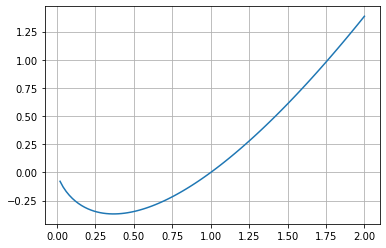

In [35]:
x = np.linspace(0, 2, 101)
y = x * np.log(x)
plt.plot(x, y)
plt.grid()
plt.show()

In [69]:
for x, y in itertools.product([0, 1], repeat=2): 
    print(f'x={x}, y={y}, x^y={x^y}')

x=0, y=0, x^y=0
x=0, y=1, x^y=1
x=1, y=0, x^y=1
x=1, y=1, x^y=0


In [99]:
y = np.array([0, 0, 0, 1, 1, 1])
y_pred = np.array([0.5, 0, 1, 0.5, 0, 1])

In [106]:
n = len(y)
critical_indexes = [y_pred[i]==0 or y_pred[i]==1 for i in range(n)]
critical_indexes

[False, True, True, False, True, True]

In [117]:
y_pred[[not i for i in critical_indexes]]

array([0.5, 0.5])

In [124]:
y[critical_indexes] ^ y_pred.astype(np.int)[critical_indexes]

array([0, 1, 1, 0])

In [131]:
(y[critical_indexes] ^ y_pred.astype(np.int)[critical_indexes])

array([0, 1, 1, 0])

In [123]:
np.array([0, 0, 0]).any()

False

In [93]:
np.any([(y_pred[i]==0 or y_pred[i]==1) and bool(y_pred[i] ^ y[i])  for i in range(n)])

True

In [105]:
critical_indexes = [y_pred[i]==0 or y_pred[i]==1 for i in range(n)]
critical_indexes

[False, True, True, False, True, True]

In [103]:
y[]

array([0, 0, 1, 1])

In [10]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [14]:
# Стандартизируем пространство признаков.
X_st = X.copy().astype(np.float64)

for i in range(1, X_st.shape[0]):
    X_st[i] = calc_std_fit(X_st[i])

In [12]:
eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.49490498 -0.15176383  0.63606273  1.51685213] 0.7537963671147336
1000 [ 0.49302779 -0.16517964  0.62452877  1.51076764] 0.746724940751059
1500 [ 0.49108348 -0.1785107   0.61308755  1.50477718] 0.7397590436228698
2000 [ 0.48907297 -0.19175599  0.60174001  1.49888154] 0.7328987295542733
2500 [ 0.48699728 -0.20491448  0.59048704  1.49308149] 0.7261440408235792
3000 [ 0.48485747 -0.2179851   0.57932959  1.48737779] 0.7194950087719248
3500 [ 0.48265464 -0.2309668   0.56826856  1.48177119] 0.7129516542296922
4000 [ 0.48038998 -0.24385851  0.5573049   1.47626245] 0.7065139877424161
4500 [ 0.4780647  -0.25665911  0.54643953  1.4708523 ] 0.7001820095791962
5000 [ 0.47568011 -0.26936752  0.5356734   1.46554146] 0.6939557095083029


array([ 0.47568011, -0.26936752,  0.5356734 ,  1.46554146])

**2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.**

**3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который 1. уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).**

**4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).**

**5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.**

**6. Могла ли модель переобучиться? Почему?**